- **Student ID: 1155210995**
- **Student Name: HOU HAORAN**

## **Daily_passenger_traffic Dataset Background**

### **Dataset Description**
The Daily_passenger_traffic Dataset provides a overall insights of everyday situation of how many people go through the custons between Hong Kong and Shenzhen and which custom they choose and whether they are arriving in Hong Kong or leaving. It contains key attributes related to the passengers, including Control Point, Identity and Numbers, which can be leveraged to uncover insights and patterns in daily passenger traffic.

### **Aim of Testing**:

The primary objective of this analysis is to examine the hypothesis: "*Did passengers prefer to leave Hong Kong by Express Rail Link (ERL) than Flights from year 2023 to 2024?*" We intend to use data to determine the accuracy of this claim.

### **Related Features of the Dataset**

- **Control Point**: Including **Airport**, **Express Rail Link West Kowloon**, Hung Hom, Lo Wu, Lok Ma Chau Spur Line, Heung Yuen Wai, Hong Kong-Zhuhai-Macao Bridge, Lok Ma Chau, Man Kam To, Sha Tau Kok, Shenzhen Bay, China Ferry Terminal, Harbour Control, Kai Tak Cruise Terminal, Macau Ferry Terminal and Tuen Mun Ferry Terminal.
- **Status**: Traffic status (0 = non_ERL, 1 = ERL.) ERL refers to Express Rail Link West Kowloon. And to make it simple, I use non_ERL to represent Airport.
- **Identity**: Identity of the passenger (HK Residents, Mainland Vistors, Other Vistors)

### **Raw Data Repository**
You can access the upadting daily figure of passenger traffic (English) on https://data.gov.hk/en/ :
https://www.immd.gov.hk/opendata/eng/transport/immigration_clearance/statistics_on_daily_passenger_traffic.csv

Data from 2023/01/15 to 2024/12/31: [Selected data](https://raw.githubusercontent.com/hrhou929/stat1013-project/refs/heads/main/statistics_on_daily_passenger_traffic.csv)

### **Sample Size**
The dataset comprises a total of **717** days record (from 2023/01/15 to present day, data is updating day by day. And due to the COVID, Express Rail Link West Kowloon reopened from 2023/01/15. *So we choose 2023/01/15 as the first dat and 2024/12/31 as the final day* ), providing a rich source of data for analysis.

## **Hypothesis Questions**

- Tell us what your idea is and why you have chosen to pursue this idea.
  - We are interested in "*Did passengers prefer to leave Hong Kong by Express Rail Link (ERL) than Flights from year 2023 to 2024?*"

- What two groups you are comparing:
  - **G1**: Rate of *ERL* chosen; *(choosing Express Rail Link West Kowloon)*
  - **G2**: Rate of *non_ERL* chosen. *(choosing Airport)*
  Notice that the sum of 2 percentages of ERL and non_ERL is not 100% because non_ERL is a simplified expression.


- What you will be measuring (i.e., what your response variable will be)
  - `Express Rail Link West Kowloon`

- Is your response variable quantitative rather than categorical?
  - `Express Rail Link West Kowloon` is binary data (under my simplified situation, which considers Airport as non_ERL and ignore other Control Points), with the order `1 > 0`, which can be considered a *quantitative variable*.

- Make a prediction about what kind of difference you expect to see between your samples and WHY.
  - We anticipate that `Express Rail Link West Kowloon` of **G1** will be greater through time, based on the [fact](https://www.immd.gov.hk/opendata/eng/transport/immigration_clearance/statistics_on_daily_passenger_traffic.csv) that there are more and more trains be operated.

- Talk about how you will gather your data
  - The data will be sourced from the following [HK Gov Data](https://www.immd.gov.hk/opendata/eng/transport/immigration_clearance/statistics_on_daily_passenger_traffic.csv).
Below is dataset only contains data from 2023/01/15 to 2024/12/31: https://raw.githubusercontent.com/hrhou929/stat1013-project/refs/heads/main/statistics_on_daily_passenger_traffic.csv

- If you had unlimited resources (time, money, staff, etc.) how would you collect your data?
  - With unlimited resources, I will collect detailed information about each passenger's journey (such as destination) to obtain exact data. At the same time, I will interview citizens on the street to explore whether there is a correlation between the social perception of this hypothesis and the actual trend and then measure the error of the estimate.

## **Prepare your dataset**

In [18]:
## load dataset from github
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/hrhou929/stat1013-project/refs/heads/main/statistics_on_daily_passenger_traffic.csv')
df.head(5)

,Date,Control Point,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total
0,15-01-2023,Airport,Arrival,20690,3469,3799,27958
1,15-01-2023,Airport,Departure,17647,3631,6205,27483
2,15-01-2023,Express Rail Link West Kowloon,Arrival,3262,1205,252,4719
3,15-01-2023,Express Rail Link West Kowloon,Departure,2648,1017,64,3729
4,15-01-2023,Hung Hom,Arrival,0,0,0,0


##A cleaned and simplified dataset

In [46]:
# use date to clust
df['Date'] = pd.to_datetime(df['Date'])

# total departure of Express Rail Link West Kowloon
df_express = df[(df['Control Point'] == 'Express Rail Link West Kowloon') &
                (df['Arrival / Departure'] == 'Departure')].groupby('Date')['Total'].sum().reset_index()
df_express['Control Point'] = 1

# total departure of Airport
df_non_express = df[(df['Control Point'] == 'Airport') &
                    (df['Arrival / Departure'] == 'Departure')].groupby('Date')['Total'].sum().reset_index()
df_non_express['Control Point'] = 0

# total departure of others
df_others = df[(df['Control Point'] != 'Airport') & (df['Control Point'] != 'Express Rail Link West Kowloon') &
                    (df['Arrival / Departure'] == 'Departure')].groupby('Date')['Total'].sum().reset_index()
df_others['Control Point'] = 2


# combine
df_clean = pd.concat([df_express, df_non_express,df_others]).sort_values(by=['Date', 'Control Point'])

# every day's total (All control points)
df_clean['total_day'] = df_clean.groupby('Date')['Total'].transform('sum')

# compute the percentage (only about Airport and non_Express Rail Link West Kowloon)
df_clean['Percentage'] = (df_clean['Total'] / df_clean['total_day'] * 100).round(2)


df_clean.head(5)

,Date,Total,Control Point,total_day,Percentage
0,2023-01-15,27483,0,68663,40.03
0,2023-01-15,3729,1,68663,5.43
0,2023-01-15,37451,2,68663,54.54
1,2023-01-16,21295,0,63046,33.78
1,2023-01-16,3613,1,63046,5.73


In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2151 entries, 0 to 716
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2151 non-null   datetime64[ns]
 1   Total          2151 non-null   int64         
 2   Control Point  2151 non-null   int64         
 3   total_day      2151 non-null   int64         
 4   Percentage     2151 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 100.8 KB


- Tell us what groups you want to compare in the dataset
  - **G1** (ERL | Control Point = Express Rail Link West Kowloon) vs. **G2** (ERL | Control Point = Airport)

- Print first 5 records of each group, respectively.

In [48]:
## First 5 records of G1 (ERL)
(df_clean[(df_clean['Control Point'] == 1)][['Control Point', 'Total','Percentage']]).head(5)

,Control Point,Total,Percentage
0,1,3729,5.43
1,1,3613,5.73
2,1,4867,6.58
3,1,7591,7.52
4,1,9162,7.79


In [49]:
## First 5 records of G2 (non_ERL)
(df_clean[(df_clean['Control Point'] == 0)][['Control Point', 'Total','Percentage']]).head(5)

,Control Point,Total,Percentage
0,0,27483,40.03
1,0,21295,33.78
2,0,26345,35.61
3,0,31590,31.29
4,0,34717,29.52


In [50]:
## Any other data description
## and visualization you want to add.

1. Creation and interpretation of at least one suitable graphs (e.g., boxplot, violinplot, barplot) for each group **(4 points)**.


The first plot is a histogram that visualizes the overall distribution of survival among all passengers.

Text(0.5, 1.0, 'Histogram of Airport, Express Rail Link West Kowloon and others daliy counts')

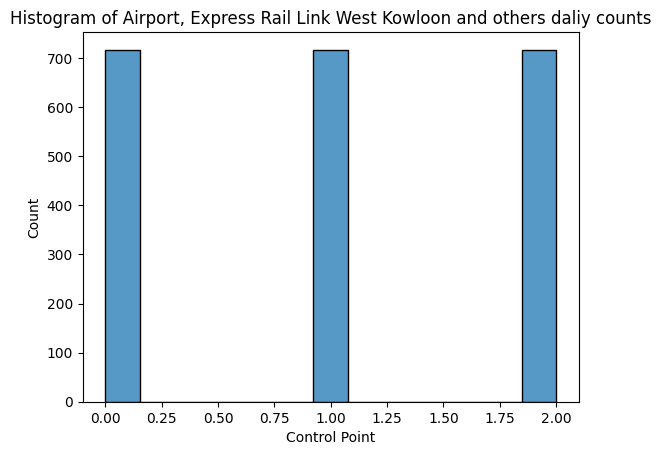

In [51]:
import seaborn as sns
m_fig = sns.histplot(data=df_clean, x='Control Point')
m_fig.set_title('Histogram of Airport, Express Rail Link West Kowloon and others daliy counts')

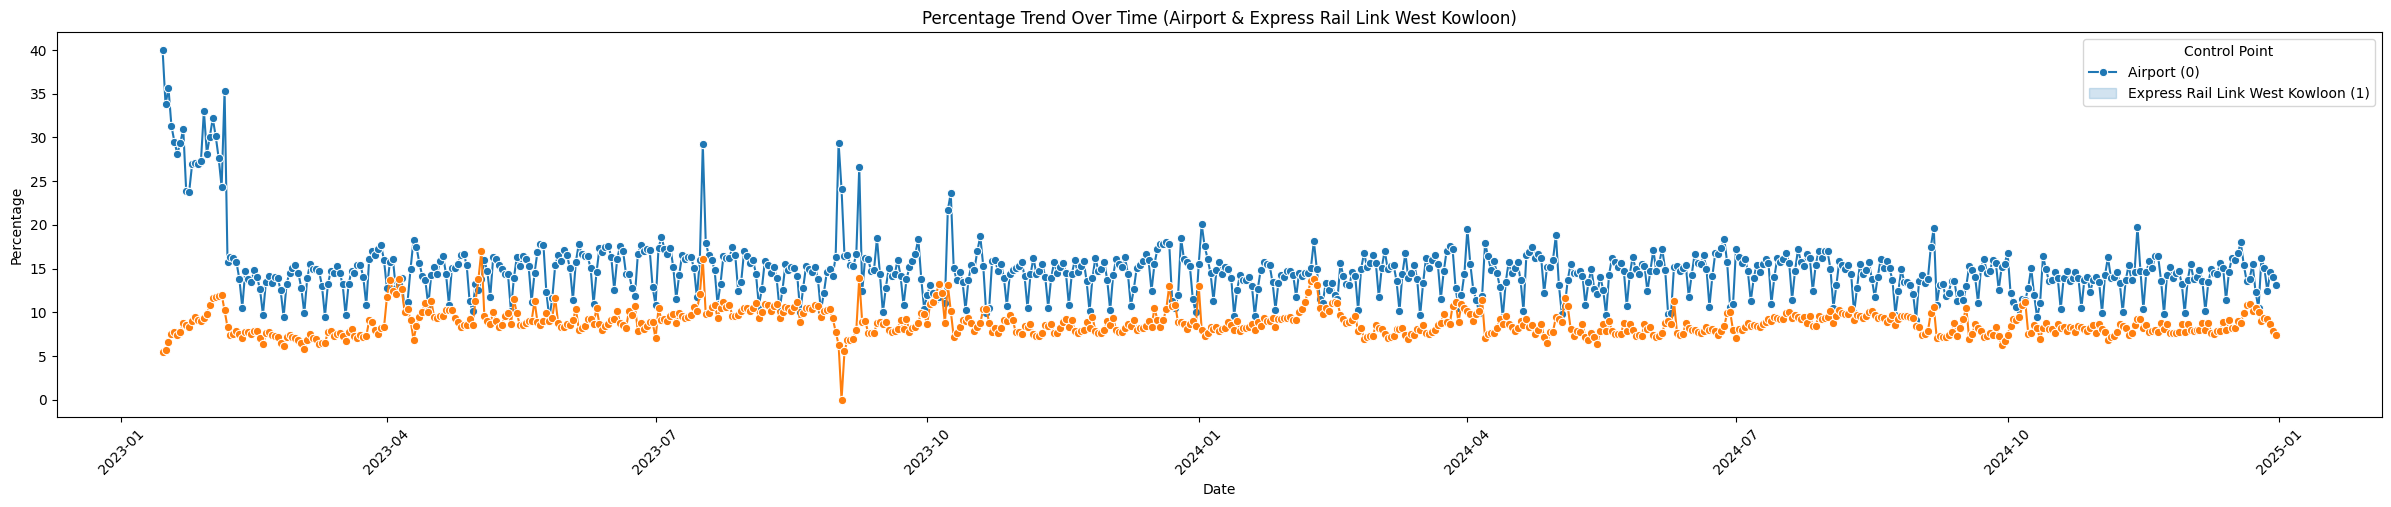

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df_clean[df_clean['Control Point'].isin([0, 1])]

# draw picture
plt.figure(figsize=(30, 5))
sns.lineplot(x='Date', y='Percentage', hue='Control Point', data=df_filtered, marker='o')

# title and
plt.title('Percentage Trend Over Time (Airport & Express Rail Link West Kowloon)')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Control Point', labels=['Airport (0)', 'Express Rail Link West Kowloon (1)'])

# show graph
plt.show()

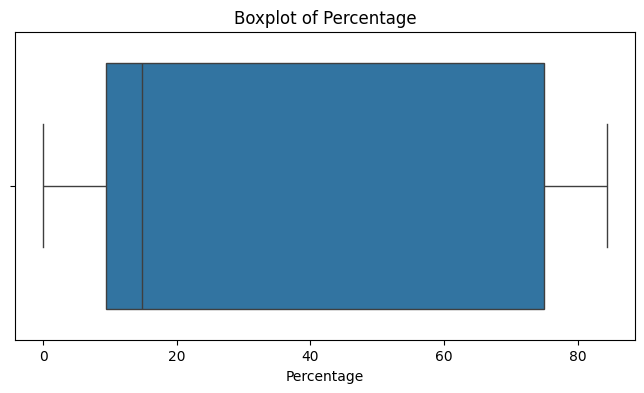

In [53]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_clean['Percentage'])
plt.title('Boxplot of Percentage')
plt.show()

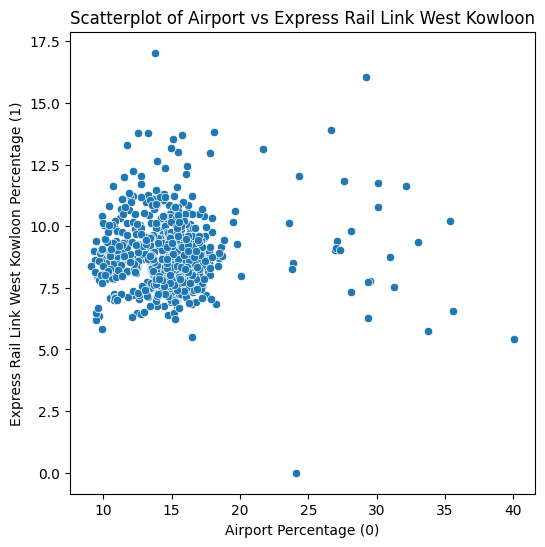

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pivot = df_clean.pivot(index='Date', columns='Control Point', values='Percentage')

plt.figure(figsize=(6, 6))
sns.scatterplot(x=df_pivot[0], y=df_pivot[1])
plt.xlabel("Airport Percentage (0)")
plt.ylabel("Express Rail Link West Kowloon Percentage (1)")
plt.title("Scatterplot of Airport vs Express Rail Link West Kowloon")
plt.show()

<Figure size 2000x400 with 0 Axes>

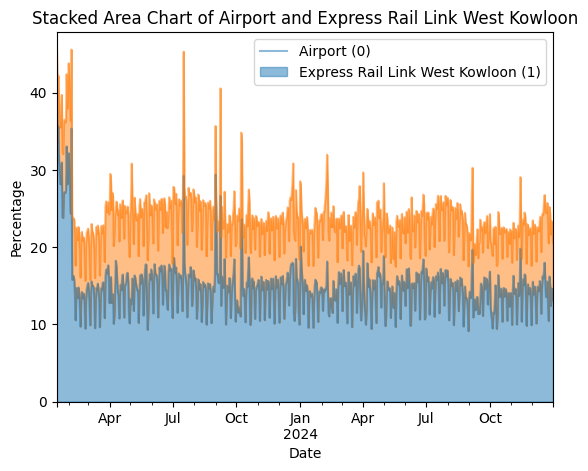

In [55]:
plt.figure(figsize=(20, 4))
df_pivot[[0, 1]].plot.area(alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Percentage")
plt.title("Stacked Area Chart of Airport and Express Rail Link West Kowloon")
plt.legend(["Airport (0)", "Express Rail Link West Kowloon (1)"])
plt.show()

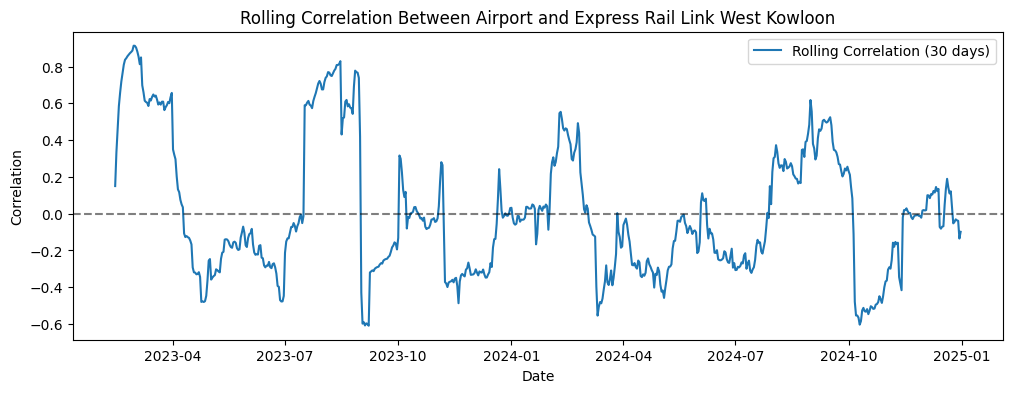

In [56]:
rolling_corr = df_pivot[0].rolling(window=30).corr(df_pivot[1])

plt.figure(figsize=(12, 4))
plt.plot(df_pivot.index, rolling_corr, label="Rolling Correlation (30 days)")
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)  # 参考线
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.title("Rolling Correlation Between Airport and Express Rail Link West Kowloon")
plt.legend()
plt.show()

2. Provision of appropriate summary statistics (measures of center and spread) for each group, with a descriptive analysis of the data **(3 points)**.

In [57]:
correlation_pearson = df_clean.pivot(index='Date', columns='Control Point', values='Percentage')[[0, 1]].corr(method='pearson')
correlation_spearman = df_clean.pivot(index='Date', columns='Control Point', values='Percentage')[[0, 1]].corr(method='spearman')

print("Pearson Correlation:\n", correlation_pearson)
print("Spearman Correlation:\n", correlation_spearman)

Pearson Correlation:
 Control Point         0         1
Control Point                    
0              1.000000  0.014087
1              0.014087  1.000000
Spearman Correlation:
 Control Point         0         1
Control Point                    
0              1.000000 -0.032583
1             -0.032583  1.000000


In [58]:
summary_stats = df_clean.groupby("Control Point")["Percentage"].describe()
summary_stats["IQR"] = summary_stats["75%"] - summary_stats["25%"]

# compute median
median = df_clean.groupby("Control Point")["Percentage"].median()

# add median to summary_stats
summary_stats["median"] = median

print(summary_stats[["mean", "median", "std", "IQR", "min", "max"]])

                    mean  median       std   IQR    min    max
Control Point                                                 
0              14.905900   14.74  3.603348  2.62   9.12  40.03
1               8.780293    8.60  1.434222  1.66   0.00  17.04
2              76.313794   76.70  3.896998  3.08  54.43  84.36


3. Discussion of similarities and differences between the groups **(3 points)**.

- **Similarity**: Both groups have a relatively stable trend as time flies by. At the same time, their fluctuations are closely related to weekdays or weekends, which is a clear indication of the transportation preferences of travelers and business travelers. Moreover,they both have outliers and it's instersting that they have a nagetive relationship.
-
- **Difference**: Airport have a significantly larger percentage than ERL which show us the answer to the question we asked at the beginning is "NO". Futhermore, the standard devision of Airport (3.60) is larger than ERL (1.43). Statistical analyses also reveal that Airport had a significantly higher mean (14.91) and median (14.74) compared to Express Rail Link West Kowloon (mean = 8.78, median = 8.60). This stark contrast highlights the disparity in percentage values between the two regions, with Airport exhibiting higher values overall.